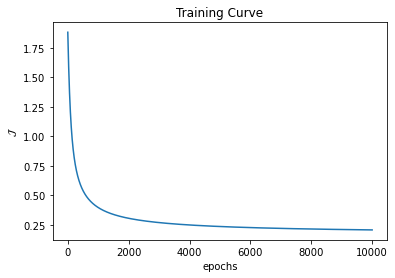

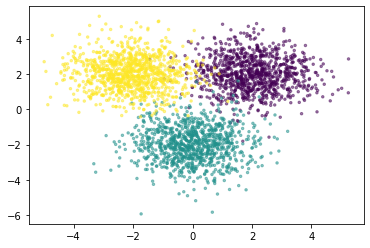

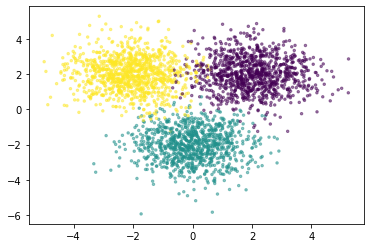

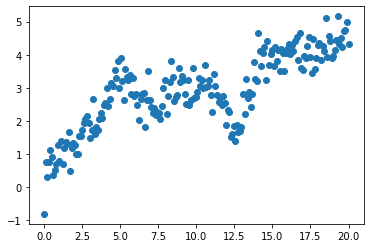

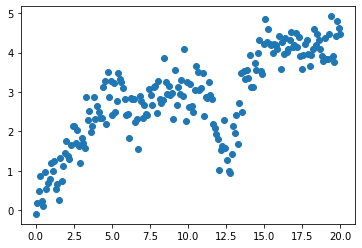

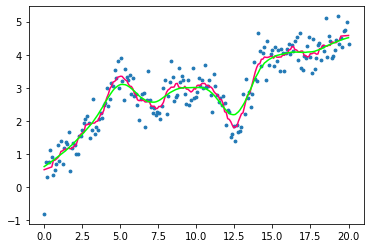

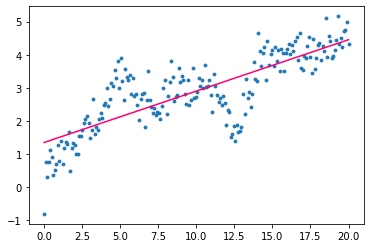

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import math
from Logistic_Regression import LogisticRegression, accuracy
from Simple_Regression import OURLinearRegression, KNNRegressor,R2,KMeans
import random

random.seed(9001)
#WHAT!? 9000!?!?

In [2]:
df=pd.read_csv(r'C:\Users\Field Employee\OneDrive\Desktop\Cirrhosis\Cirrhosis.csv')
nan_col=[]
for header in df.head():
    pd.to_numeric(df[header])
    nan_col=[]
for header in df.head():
    miss=df[header].isnull().values.any()
    if miss==True:
            nan_col.append(header)

df=df.drop(columns='index')

In [3]:
print(pd.unique(df['status']))
"status: [2,0,1] [dead, negative, positive]?"
'age is in days'

[2 0 1]


'age is in days'

In [4]:
print(nan_col)
#nan_chol->28
#copper->2
#triglicerides->30
##platelets->4

['cholesterol', 'copper', 'triglicerides', 'platelets']


In [5]:
'''Gather the indicies with null values'''
nan_cop=df.loc[df['copper'].isnull()]
nan_cop=nan_cop['copper']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
nan_cop=nan_cop.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(nan_cop)):
    row=nan_cop.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
df.shape

(310, 19)

In [6]:
maxi=np.amax(df['copper'].to_numpy())
mini=np.amin(df['copper'].to_numpy())

In [7]:
df['copper'].apply(lambda x: (x-mini)/(maxi-mini))
norm_cop=[]
for row in df['copper']:
    norm=(row-mini)/(maxi-mini)
    norm_cop.append(norm)
df['copper']=norm_cop

In [8]:
chol_mean=np.mean(df['cholesterol'])
#sorted max:546.0, 576.0, 646.0, 1000.0, 1336.0

In [9]:
'''Gather the indicies with null values'''
nan_chol=df.loc[df['cholesterol'].isnull()]
nan_chol=nan_chol['cholesterol']
chol_ind=[]
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
nan_chol=nan_chol.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(nan_chol)):
    row=nan_chol.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    chol_ind=[ind]
    i+=1
    

In [10]:
print(chol_ind)
for ind in chol_ind:
    df.at[ind,'cholesterol']=chol_mean

[299.0]


In [11]:
tri_mean=np.mean(df['triglicerides'])

In [12]:
'''Gather the indicies with null values'''
nan_tri=df.loc[df['triglicerides'].isnull()]
nan_tri=nan_tri['triglicerides']
tri_ind=[]
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
nan_tri=nan_tri.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(nan_tri)):
    row=nan_tri.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    tri_ind=[ind]
    i+=1
    

In [13]:
print(tri_ind)
for ind in tri_ind:
    df.at[ind,'triglicerides']=tri_mean

[299.0]


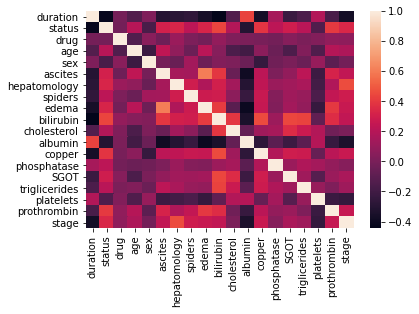

In [15]:
corr=df.corr()
sn.heatmap(corr)
plt.show()

<AxesSubplot:xlabel='edema', ylabel='ascites'>

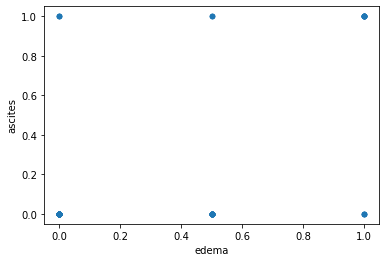

In [37]:
'''scatter for edema & ascites'''
df.plot.scatter(x= 'edema', y= 'ascites')

In [17]:
X_labels=['edema']
val_ind=math.floor(len(df)*.9)
features=df[X_labels]
Yset=df['ascites']
print(features.shape)
print(Yset.shape)
train_ind=math.floor(len(features)*.8)
train_X=features.iloc[:train_ind,:]
train_X=train_X.to_numpy()
train_y=Yset.iloc[:train_ind]
train_y=train_y.to_numpy()
val_X=features.iloc[train_ind:val_ind,:]
val_X=val_X.to_numpy()
val_y=Yset.iloc[train_ind:val_ind]
val_y=val_y.to_numpy()
test_X=features.iloc[val_ind:,:]
test_X=test_X.to_numpy()
test_y=Yset.iloc[val_ind:]
test_y=test_y.to_numpy()

(310, 1)
(310,)


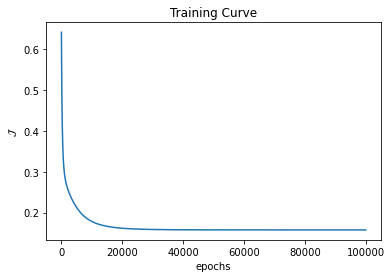

Test Accuracy: 0.9677


In [36]:
log_reg = LogisticRegression()
log_reg.fit(train_X, train_y, eta = 1e-2, epochs=1e5, show_curve = True)
y_hat = log_reg.predict(test_X)
print(f"Test Accuracy: {accuracy(test_y, y_hat):0.4f}")

In [46]:
#Custom input
print(log_reg.predict([]))

[0]
